In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from dt import DecisionTreeClassifier

# Exploratory Data Analysis (EDA)

## Read Dataset

In [2]:
iris = pd.read_csv("Iris.csv")

Change class labels that are given in the last column to integer values (0, 1, 2).

In [3]:
iris.Species = pd.factorize(iris.Species)[0]
del iris['Id']


## Dateset Summary

In [4]:
display(iris)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Summary of each features

In [5]:
print(iris["SepalLengthCm"].describe())

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64


In [6]:
print(iris["SepalWidthCm"].describe())

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64


In [7]:
print(iris["PetalLengthCm"].describe())

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64


In [8]:
print(iris["PetalWidthCm"].describe())

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64


Duplicate data in the dataset

In [9]:
display(iris[iris.duplicated()])
display(iris.duplicated().sum())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


3

Checking balance of dataset

/Users/bugra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Species Count'}, xlabel='Species', ylabel='count'>

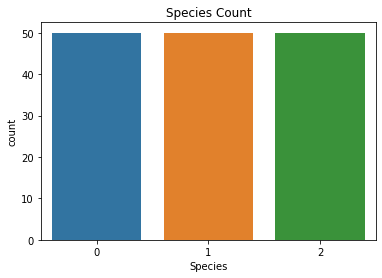

In [10]:
plt.title("Species Count")
sns.countplot(iris["Species"])

## Pair-plots for features

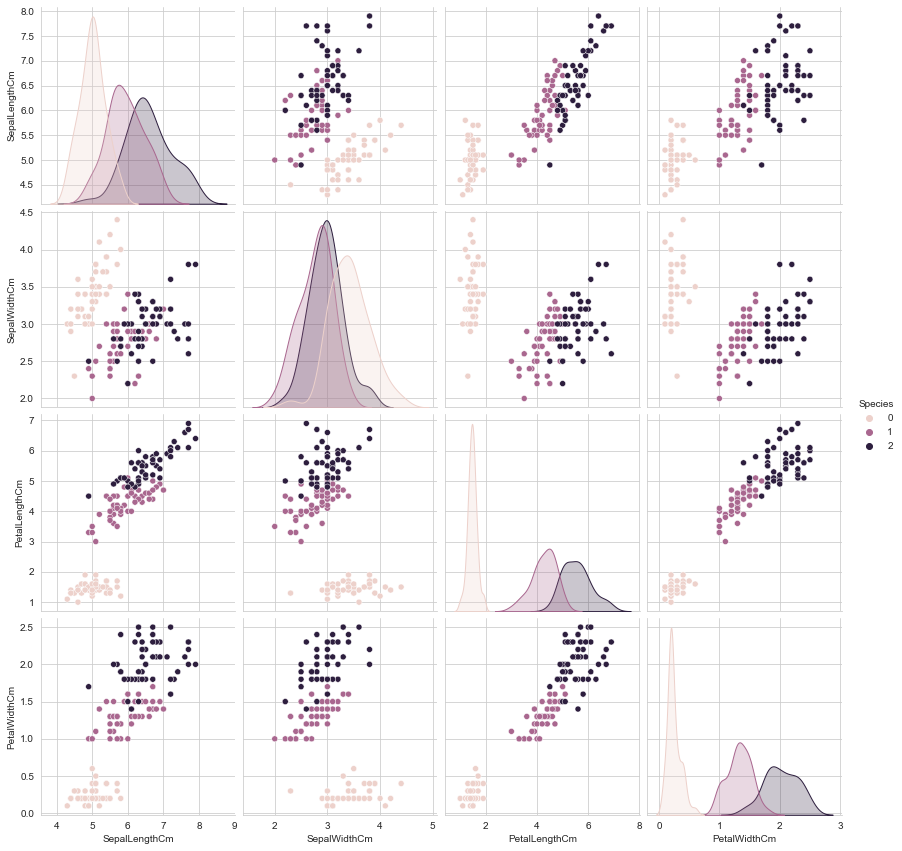

In [11]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue="Species", height=3)
plt.show()

# Train the classifier

In [12]:
clf = DecisionTreeClassifier(max_depth=5)

Split dataset to train and test

In [13]:
X=iris.values.tolist();
y=[];
for row in X:
    y.append(int(row[4]));
    del row[4];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

### Train The Classifier

In [14]:
clf.fit(X_train_list,y_train_list)

### Predict Class of Test values

In [15]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);
xhat = clf.predict(X_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(xhat);

Test Features Expected Classification
[0, 2, 1, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2]
Prediction
[0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1]
Train Features Expected Classification
[1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2]
Prediction
[1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 2, 

# Results

### Confusion Matrix of Test

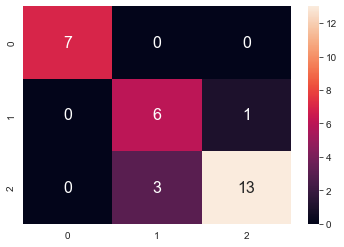

In [16]:
y_pred2 = pd.Series(yhat)
y_test2 = pd.Series(y_test_list)
mt = metrics.confusion_matrix(y_test2, y_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.heatmap(df_cm,annot=True,annot_kws={"size":16})
plt.show()

### Confusion Matrix of Train

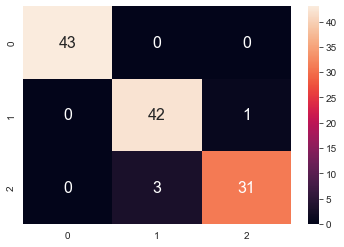

In [17]:
x_pred2 = pd.Series(xhat)
x_test2 = pd.Series(y_train_list)
mt = metrics.confusion_matrix(x_test2,x_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.heatmap(df_cm,annot=True,annot_kws={"size":16})
plt.show()

### F1-Score

In [18]:
print('F1-Score Train:')
print(metrics.f1_score(y_test2, y_pred2, average='weighted'))

print('F1-Score Test:')
print(metrics.f1_score(x_test2, x_test2, average='weighted'))

F1-Score Train:
0.8705555555555555
F1-Score Test:
1.0


### Accuracy

In [19]:
accuracy = metrics.accuracy_score(y_test2, y_pred2)
print("Accuracy Test:")
print(accuracy)
accuracy2 = metrics.accuracy_score(x_test2, x_test2)
print("Accuracy Train:")
print(accuracy2)

Accuracy Test:
0.8666666666666667
Accuracy Train:
1.0


### Precision

In [20]:
precisionTest = metrics.precision_score(y_test2, y_pred2, average='weighted')
print("Precision Test:")
print(precisionTest)
precisionTraining = metrics.precision_score(x_test2, x_pred2, average='weighted')
print("Precision Training:")
print(precisionTraining)

Precision Test:
0.8841269841269842
Precision Training:
0.9672569444444444


### Recal

In [21]:
recallTest = metrics.recall_score(y_test2,y_pred2, average="weighted")
print("Recall Test:")
print(recallTest)
recallTrain = metrics.recall_score(x_test2,x_pred2, average="weighted")
print("Recall Train:")
print(recallTrain)

Recall Test:
0.8666666666666667
Recall Train:
0.9666666666666667


### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

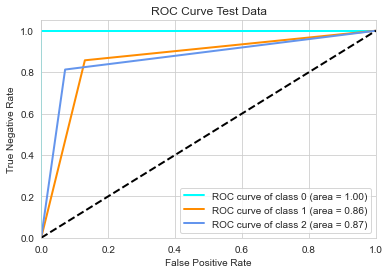

Macro Auc Value:
0.9112965838509316


In [22]:
y_testb = label_binarize(y_test2, classes = [0, 1, 2])
y_predb = label_binarize(y_pred2, classes = [0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ =roc_curve(y_testb[:,i], y_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr +=np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr/=3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label = 'ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.title('ROC Curve Test Data')
plt.legend(loc="lower right")
plt.show()
print("Macro Auc Value:")
print(roc_auc["macro"])

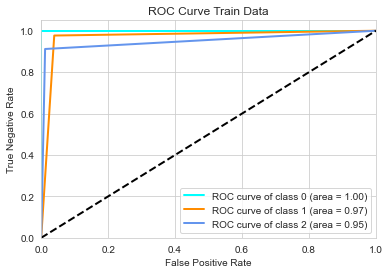

Macro Auc Value:
0.9729866576651802


In [23]:
x_testb = label_binarize(x_test2, classes = [0, 1, 2])
x_predb = label_binarize(x_pred2, classes = [0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ =roc_curve(x_testb[:,i], x_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr +=np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr/=3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label = 'ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.title('ROC Curve Train Data')
plt.legend(loc="lower right")
plt.show()
print("Macro Auc Value:")
print(roc_auc["macro"])